## 1. Big Picture: Problem Definition

In [3]:
# Problem: Predicting banana quality based on physical,chemical and environmental features.
# Learning Type: Supervised Learning.
# Task Type: Classification.
# Technique: Batch Learning.

In [4]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve

## 2. Loading and Exploring the Dataset

In [6]:
# Load the dataset
data = pd.read_csv('banana_quality_dataset.csv')

In [7]:
# Initial exploration - Dataset Head
print("Dataset Head:")
data.head()

Dataset Head:


,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7


In [8]:
# Initial exploration - Dataset Info
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sample_id           1000 non-null   int64  
 1   variety             1000 non-null   object 
 2   region              1000 non-null   object 
 3   quality_score       1000 non-null   float64
 4   quality_category    1000 non-null   object 
 5   ripeness_index      1000 non-null   float64
 6   ripeness_category   1000 non-null   object 
 7   sugar_content_brix  1000 non-null   float64
 8   firmness_kgf        1000 non-null   float64
 9   length_cm           1000 non-null   float64
 10  weight_g            1000 non-null   float64
 11  harvest_date        1000 non-null   object 
 12  tree_age_years      1000 non-null   float64
 13  altitude_m          1000 non-null   float64
 14  rainfall_mm         1000 non-null   float64
 15  soil_nitrogen_ppm   1000 non-null   float6

In [9]:
# Initial exploration - Dataset Description
print("Dataset Description:")
data.describe()

Dataset Description:


,sample_id,quality_score,ripeness_index,sugar_content_brix,firmness_kgf,length_cm,weight_g,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2.465160,4.042170,18.516830,2.706840,19.882100,164.738930,10.879600,723.556700,1972.992800,104.391300
std,288.819436,0.540909,1.753211,2.034812,1.289252,5.736318,49.163073,5.215554,427.372855,564.467912,53.607794
min,1.000000,0.920000,1.020000,15.000000,0.500000,10.000000,81.050000,2.000000,0.400000,1000.500000,10.000000
25%,250.750000,2.090000,2.447500,16.827500,1.590000,14.902500,122.397500,6.300000,353.950000,1498.750000,60.150000
50%,500.500000,2.440000,4.110000,18.500000,2.680000,19.890000,163.365000,10.700000,726.000000,1957.400000,104.100000
75%,750.250000,2.850000,5.562500,20.312500,3.820000,24.800000,205.775000,15.600000,1071.725000,2431.800000,149.850000
max,1000.000000,3.890000,7.000000,21.980000,5.000000,29.950000,249.890000,20.000000,1498.400000,2992.000000,199.900000


In [10]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values in Dataset:")
print(missing_values)


Missing Values in Dataset:
sample_id             0
variety               0
region                0
quality_score         0
quality_category      0
ripeness_index        0
ripeness_category     0
sugar_content_brix    0
firmness_kgf          0
length_cm             0
weight_g              0
harvest_date          0
tree_age_years        0
altitude_m            0
rainfall_mm           0
soil_nitrogen_ppm     0
dtype: int64


In [11]:
# Check for duplicate values
print("Duplicate Values in Dataset:")
data.duplicated().sum()

Duplicate Values in Dataset:


0

## 3. Data Preprocessing

In [13]:
# Encode categorical variables
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

#Checking transformed categorical variables for verification
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sample_id           1000 non-null   int64  
 1   variety             1000 non-null   int32  
 2   region              1000 non-null   int32  
 3   quality_score       1000 non-null   float64
 4   quality_category    1000 non-null   int32  
 5   ripeness_index      1000 non-null   float64
 6   ripeness_category   1000 non-null   int32  
 7   sugar_content_brix  1000 non-null   float64
 8   firmness_kgf        1000 non-null   float64
 9   length_cm           1000 non-null   float64
 10  weight_g            1000 non-null   float64
 11  harvest_date        1000 non-null   int32  
 12  tree_age_years      1000 non-null   float64
 13  altitude_m          1000 non-null   float64
 14  rainfall_mm         1000 non-null   float64
 15  soil_nitrogen_ppm   1000 non-null   float64
dtypes: floa

In [14]:
# Feature-target separation
X = data.drop('quality_category', axis=1)
y = data['quality_category']

In [15]:
# Split dataset into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Save the modified dataset
data.to_csv('modified_banana_quality_dataset.csv', index=False)
print("Modified dataset saved successfully.")

Modified dataset saved successfully.


## 4. Data Exploration and Visualization

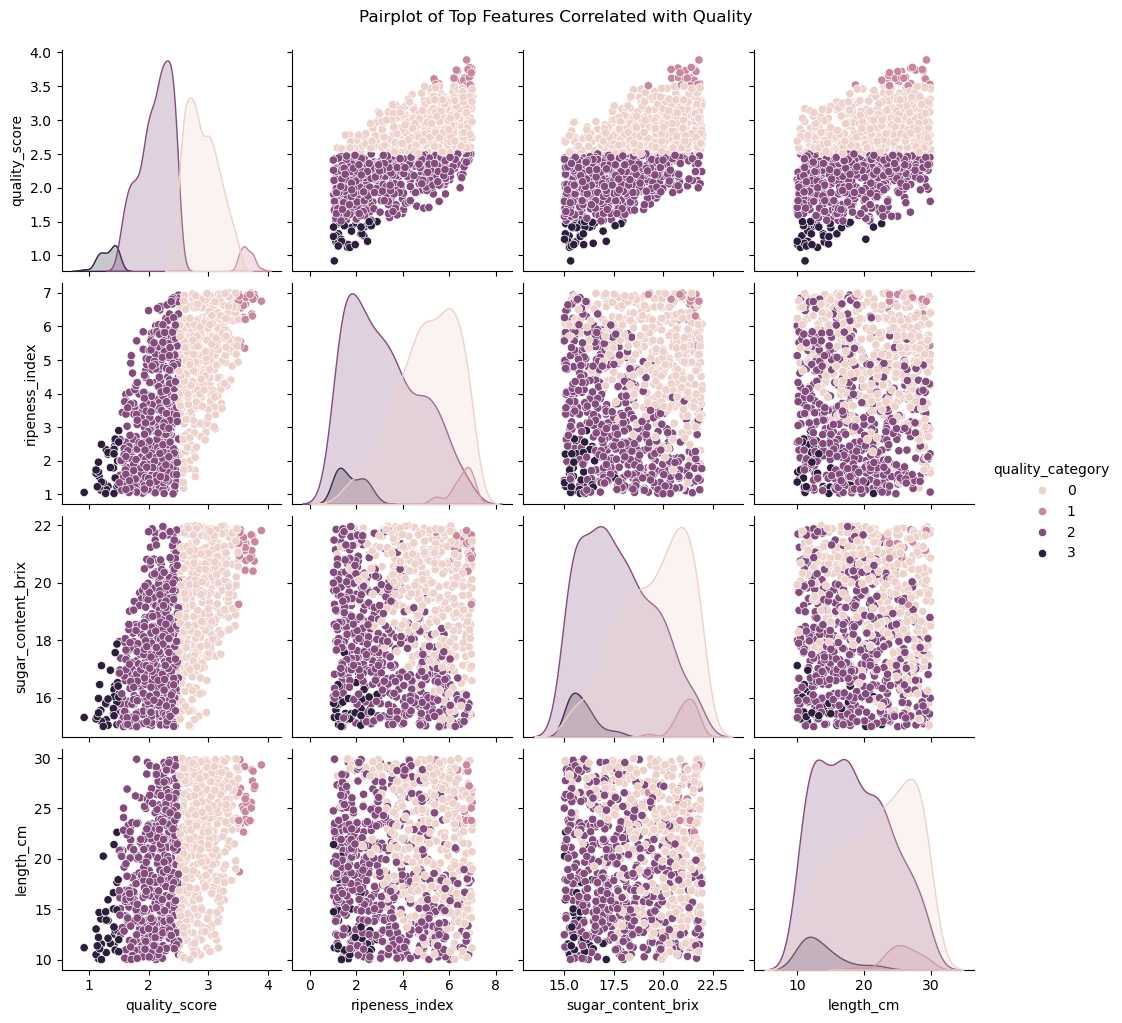

In [19]:
# Pairplot with selected features
top_corr_features = data.corr()['quality_category'].abs().sort_values(ascending=False).head(5).index
sns.pairplot(data[top_corr_features], hue='quality_category', diag_kind='kde', height=2.5)
plt.suptitle("Pairplot of Top Features Correlated with Quality", y=1.02)
plt.show()

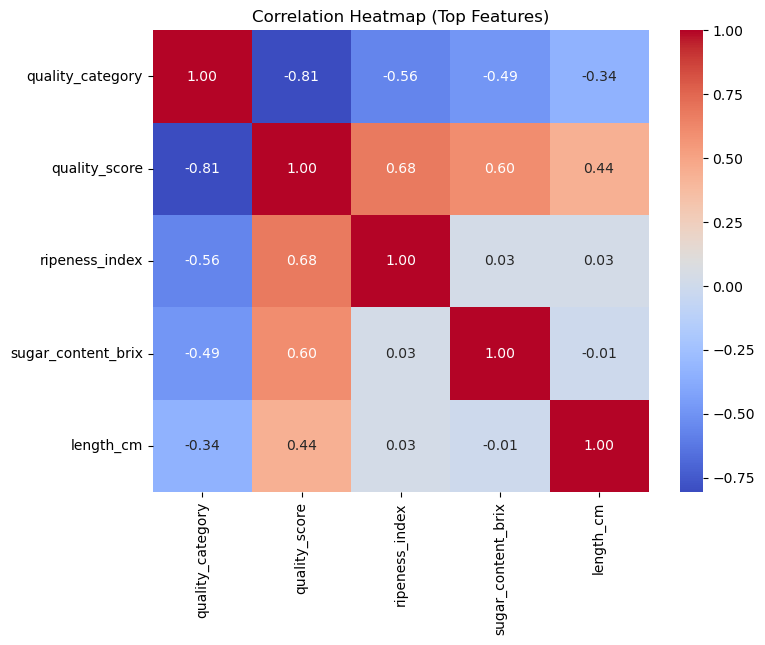

In [20]:
# Correlation heatmap with selected features
plt.figure(figsize=(8, 6))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Top Features)')
plt.show()

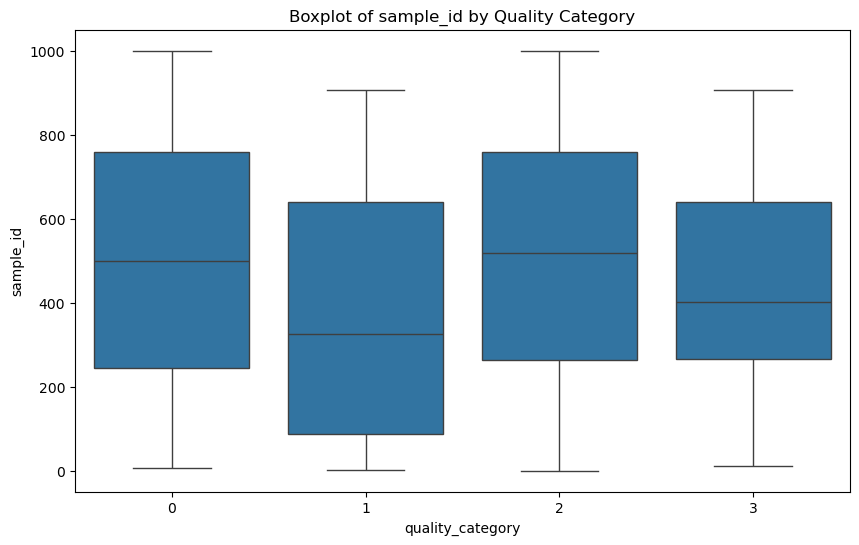

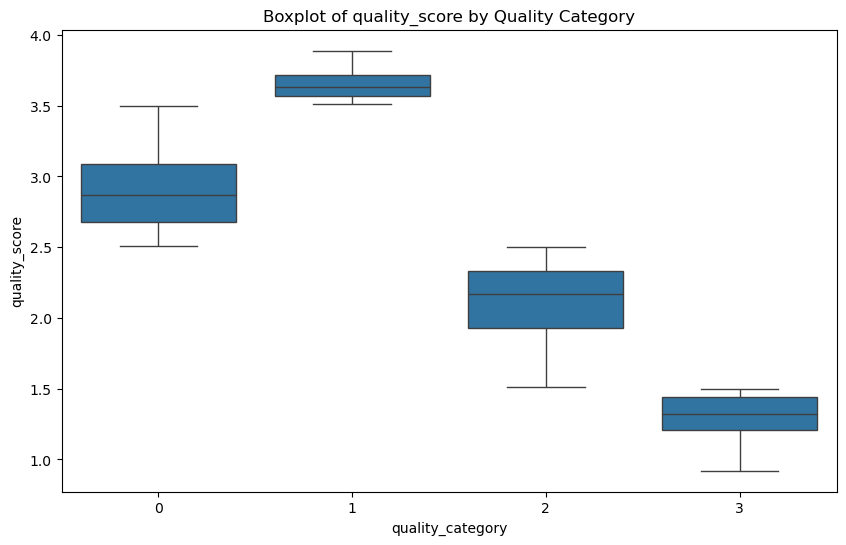

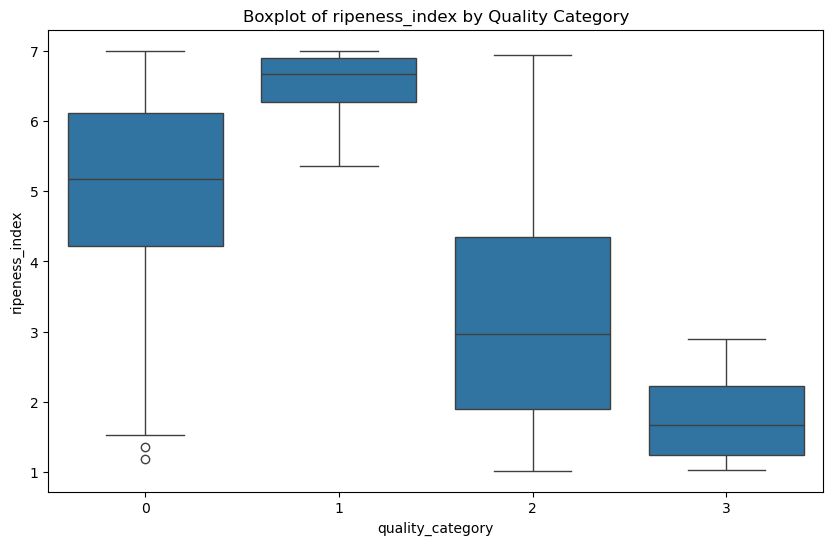

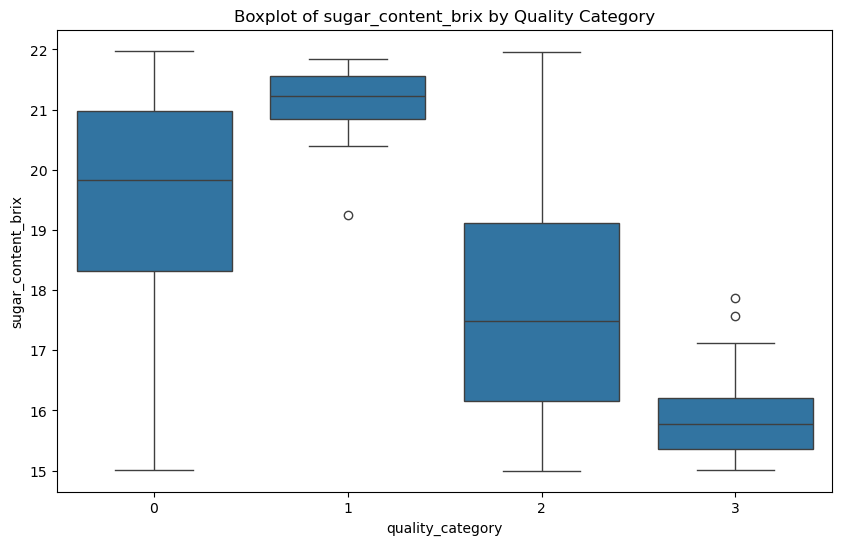

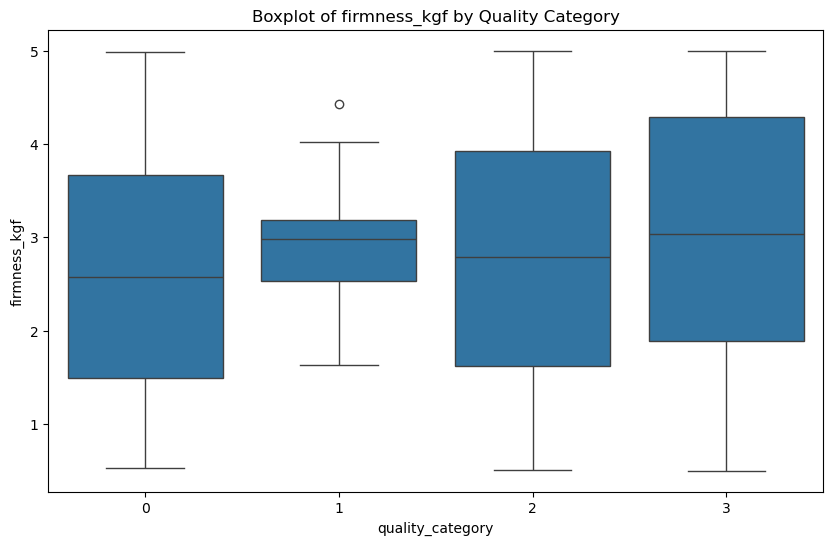

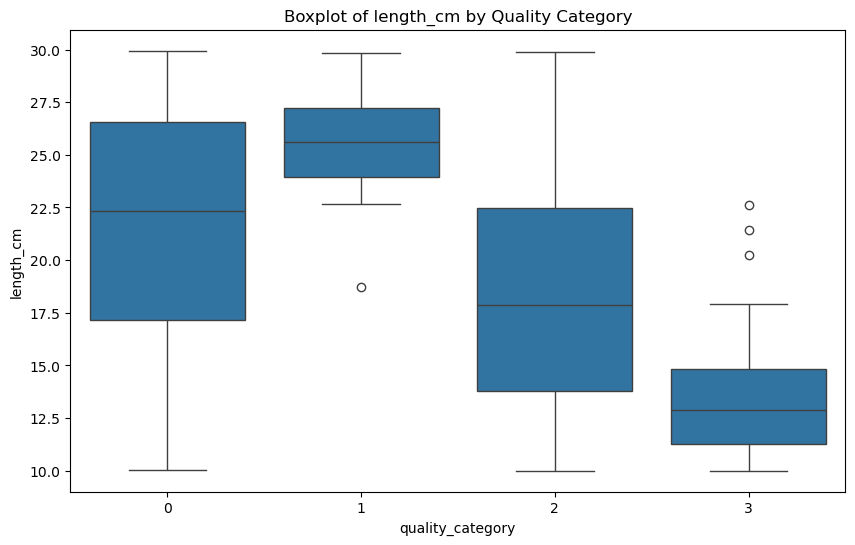

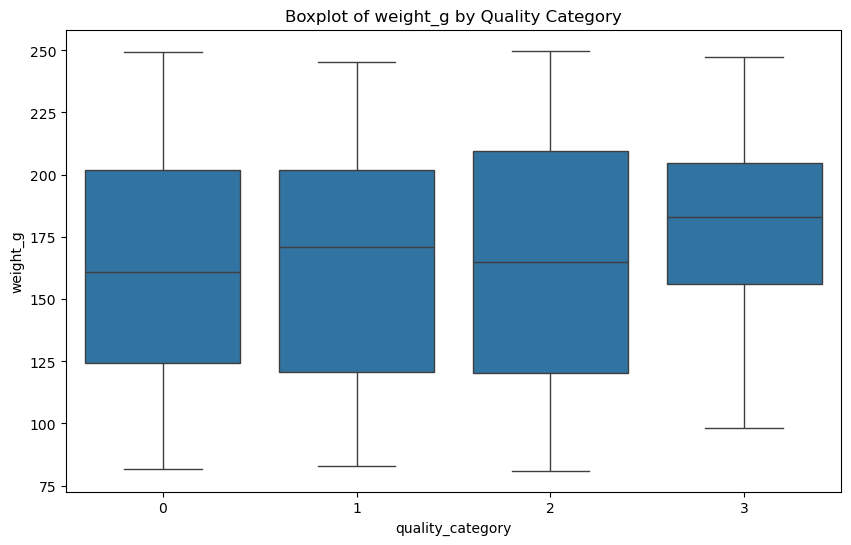

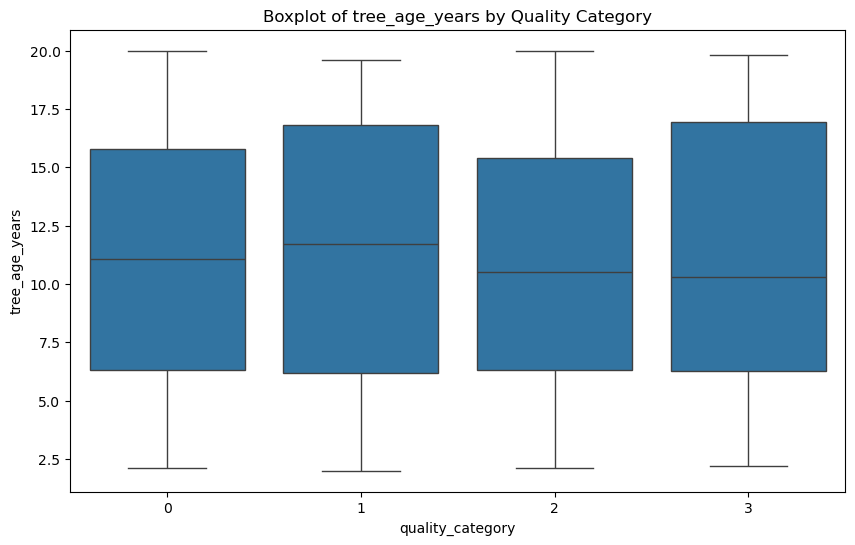

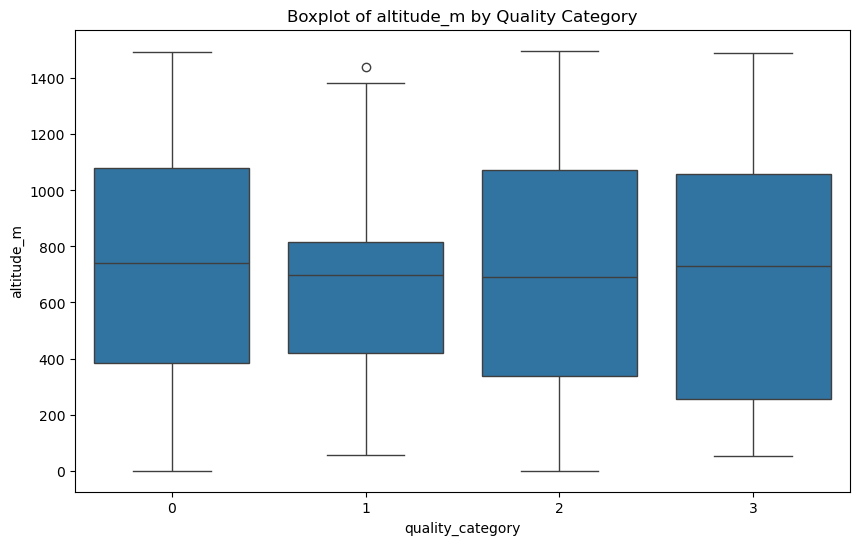

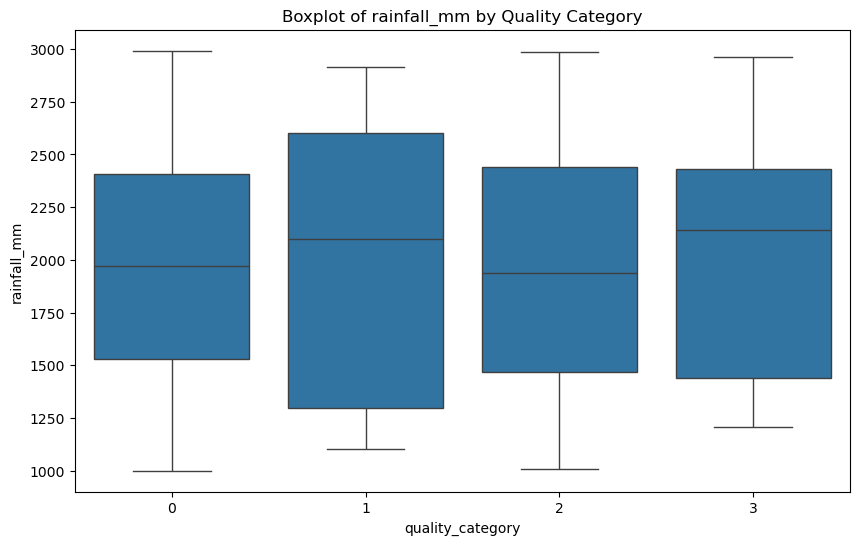

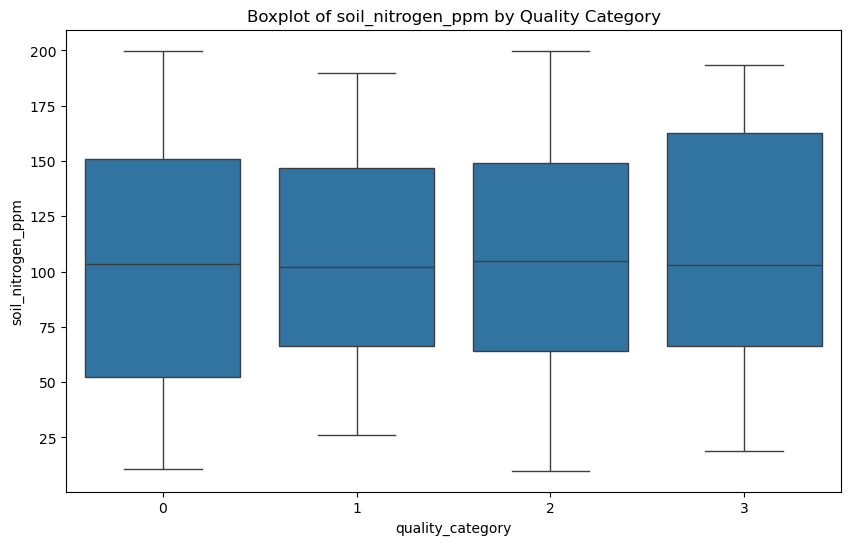

In [21]:
# Identify numeric features for boxplot
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
numeric_features = [col for col in numeric_features if col != 'quality_category']  # Exclude target variable

# Boxplots for numeric features
for column in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='quality_category', y=column, data=data)
    plt.title(f'Boxplot of {column} by Quality Category')
    plt.show()

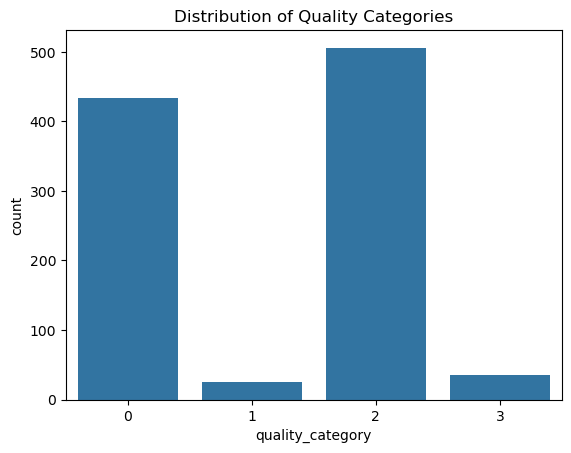

In [22]:
# Distribution of target variable
sns.countplot(x='quality_category', data=data)
plt.title('Distribution of Quality Categories')
plt.show()

## 5. Model Selection and Training

In [24]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}


In [25]:
# Train and evaluate models
model_results = {}
for name, model in models.items():
    print(f"\nTraining {name}")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, predictions))
    model_results[name] = accuracy


Training Random Forest
Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00         3
           2       0.99      1.00      1.00       100
           3       1.00      0.88      0.93         8

    accuracy                           0.99       200
   macro avg       1.00      0.97      0.98       200
weighted avg       1.00      0.99      0.99       200


Training Gradient Boosting
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00         8

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Training SVM
Accuracy: 0.92
              preci

In [26]:
# Compare models
best_model_name = max(model_results, key=model_results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy: {model_results[best_model_name]:.2f}")


Best Model: Gradient Boosting with Accuracy: 1.00


## 6. Hyperparameter Tuning for Best Model

In [28]:
# Define the hyperparameter grid for Gradient Boosting
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10]
}

# Initialize GridSearchCV for Gradient Boosting
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                           param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best-tuned model
best_tuned_model = grid_search.best_estimator_

# Evaluate the tuned model on the test set
predictions = best_tuned_model.predict(X_test)
print("\nBest Tuned Gradient Boosting Model Results:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

# Print the best parameters
print("Best Hyperparameters for Gradient Boosting:")
print(grid_search.best_params_)


Best Tuned Gradient Boosting Model Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00         8

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[ 89   0   0   0]
 [  0   3   0   0]
 [  0   0 100   0]
 [  0   0   0   8]]
Best Hyperparameters for Gradient Boosting:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


## 7. Final Evaluation and Recommendations

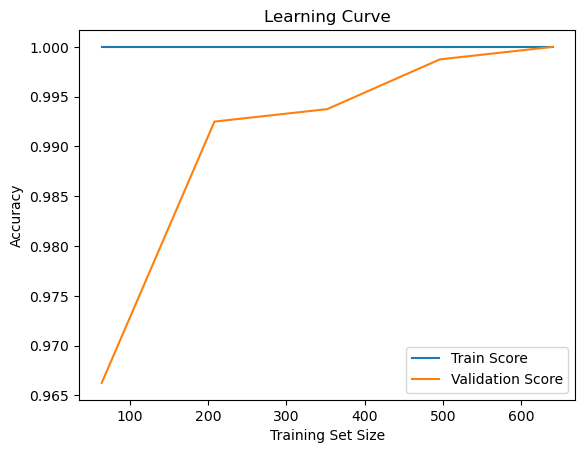

In [30]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_tuned_model, X_train, y_train, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()